<a href="https://colab.research.google.com/github/aliahalotaibi73/week4_task/blob/main/Clustering_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


In [ ]:
df = df.drop(['Did_Police_Officer_Attend_Scene_of_Accident', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities',
              '1st_Road_Number', '1st_Road_Class ', 'Light_Conditions', '2nd_Road_Class', '2nd_Road_Number' ,'Local_Authority_(District)',
              'Local_Authority_(Highway)'])

## Import Libraries

In [116]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Load the Data

In [50]:
df = pd.read_csv('/content/Traffic_Accidents.csv')
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

* from info() function we can see there is missing values.

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Location_Easting_OSGR,52000.0,440284.256846,95109.751221,98480.000000,375540.000000,440950.000000,523500.000000,6.549600e+05
Location_Northing_OSGR,52000.0,299861.656788,161362.379650,19030.000000,178010.000000,267180.000000,398149.250000,1.203900e+06
Longitude,52000.0,-1.427193,1.398249,-6.895268,-2.366190,-1.391202,-0.214666,1.753632e+00
Latitude,52000.0,52.586684,1.453049,50.026153,51.487676,52.295042,53.478016,6.071477e+01
Police_Force,52000.0,30.401712,25.545581,1.000000,7.000000,30.000000,46.000000,9.800000e+01
Accident_Severity,51678.0,2.837145,0.402582,1.000000,3.000000,3.000000,3.000000,3.000000e+00
Number_of_Vehicles,52000.0,1.834327,0.727856,1.000000,1.000000,2.000000,2.000000,3.400000e+01
Number_of_Casualties,50959.0,1.354756,0.855220,1.000000,1.000000,1.000000,1.000000,5.100000e+01
Day_of_Week,52000.0,4.130712,1.926217,1.000000,2.000000,4.000000,6.000000,7.000000e+00
Local_Authority_(District),52000.0,349.542558,259.504721,1.000000,112.000000,323.000000,530.000000,9.410000e+02


In [53]:
df.sample(30)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
30759,367290.0,425990.0,-2.497280,53.729270,4,2.0,1,1.0,24/10/2006,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Wet/Damp,1.0,Yes,2006
25073,335800.0,163580.0,-2.923638,51.367585,52,2.0,2,1.0,30/11/2005,4,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,1.0,Yes,2005
34821,365469.0,404460.0,-2.522484,53.535641,6,3.0,2,1.0,02/03/2012,6,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2012
14734,378310.0,407410.0,-2.328947,53.562846,6,3.0,1,1.0,14/08/2006,2,...,3,665,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2006
33230,321030.0,178670.0,-3.139137,51.501380,62,3.0,2,1.0,13/05/2009,4,...,6,0,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2009
48282,425203.0,562833.0,-1.607935,54.959522,10,3.0,3,2.0,15/05/2014,5,...,-1,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2014
26818,548540.0,183500.0,0.140081,51.530820,1,3.0,2,1.0,24/11/2006,6,...,3,1306,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2006
40281,376110.0,162660.0,-2.344543,51.362447,52,3.0,2,1.0,24/06/2010,5,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2010
47189,367320.0,428240.0,-2.497064,53.749495,4,3.0,2,1.0,18/04/2007,4,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2007
36152,518210.0,168020.0,-0.302123,51.398850,1,3.0,2,1.0,05/05/2012,7,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2012


In [54]:
df.Number_of_Casualties.value_counts()

,count
Number_of_Casualties,
1.0,39035
2.0,8199
3.0,2367
4.0,844
5.0,288
6.0,130
7.0,44
8.0,23
9.0,8


In [55]:
missing_values = df.isnull().sum().sum()
print("Number of missing values:",missing_values )

Number of missing values: 1995


In [56]:
df = df.drop(['Did_Police_Officer_Attend_Scene_of_Accident', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities',
              '1st_Road_Number', '1st_Road_Class', 'Light_Conditions', '2nd_Road_Class', '2nd_Road_Number' ,'Local_Authority_(District)',
              'Local_Authority_(Highway)'], axis=1)

In [57]:
df.duplicated().sum()

45

In [66]:
df.drop_duplicates(inplace=True)

In [67]:
df.duplicated().sum()

0

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

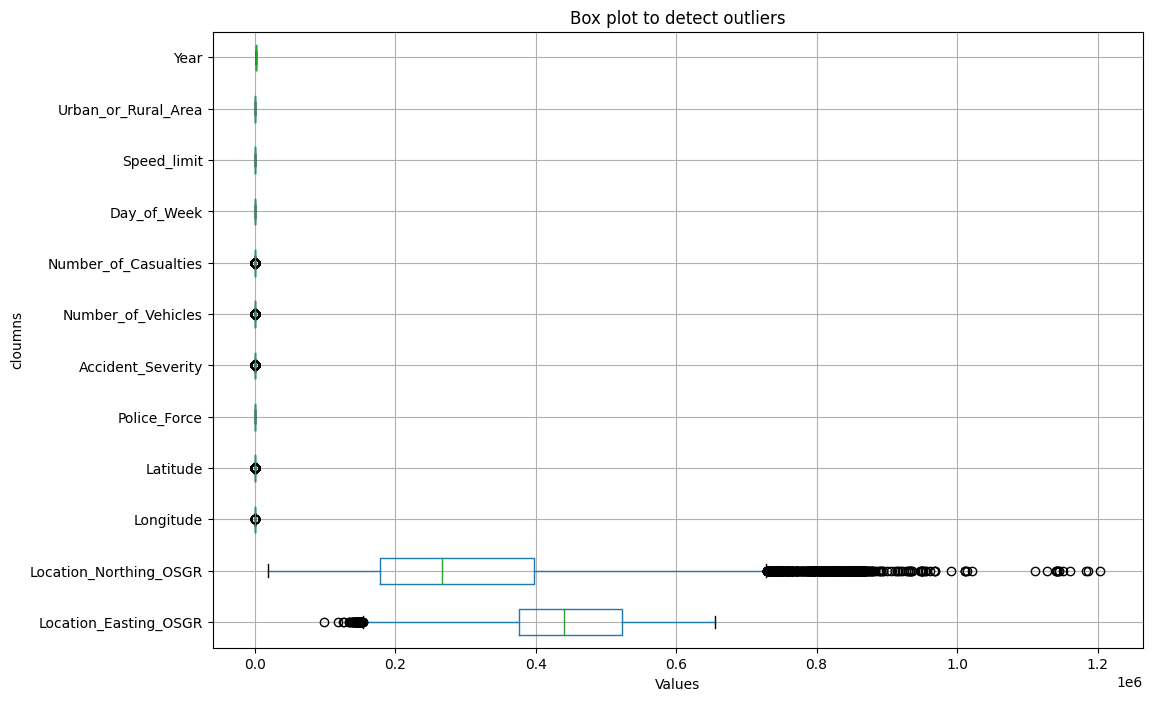

In [68]:
plt.figure(figsize=(12,8))
df.boxplot(vert=False)
plt.title('Box plot to detect outliers')
plt.xlabel('Values')
plt.ylabel('cloumns')
plt.show()

* from Boxplot above there is outliers in (Location_Northing_OSGR), value above 1.203900e+06 we be removed.

In [69]:
filtter_outlier = ['Location_Northing_OSGR']

for cloumn in filtter_outlier:
  df = df[df[cloumn] < 1.203900e+06]

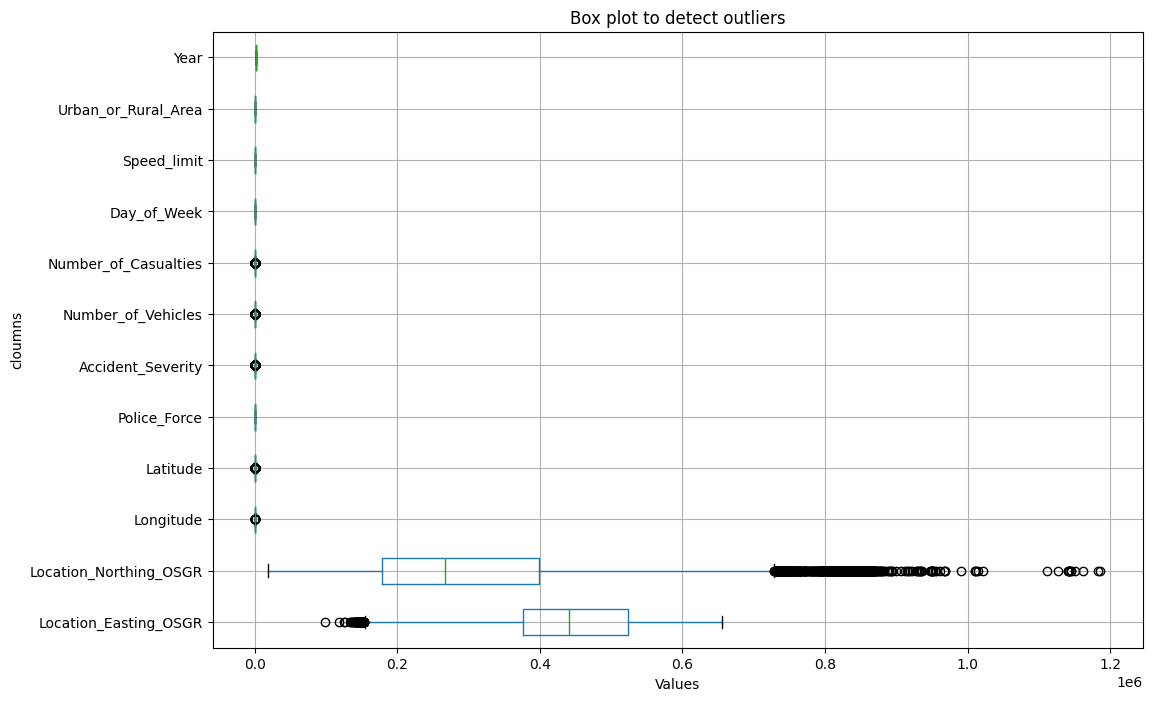

In [70]:
plt.figure(figsize=(12,8))
df.boxplot(vert=False)
plt.title('Box plot to detect outliers')
plt.xlabel('Values')
plt.ylabel('cloumns')
plt.show()

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51954 entries, 0 to 51999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Location_Easting_OSGR    51954 non-null  float64
 1   Location_Northing_OSGR   51954 non-null  float64
 2   Longitude                51954 non-null  float64
 3   Latitude                 51954 non-null  float64
 4   Police_Force             51954 non-null  int64  
 5   Accident_Severity        51632 non-null  float64
 6   Number_of_Vehicles       51954 non-null  int64  
 7   Number_of_Casualties     50913 non-null  float64
 8   Date                     51954 non-null  object 
 9   Day_of_Week              51954 non-null  int64  
 10  Road_Type                51954 non-null  object 
 11  Speed_limit              51954 non-null  int64  
 12  Weather_Conditions       51954 non-null  object 
 13  Road_Surface_Conditions  51954 non-null  object 
 14  Urban_or_Rural_Area      51

Road_Surface_Conditions , Weather_Conditions , Road_Type , Date

In [73]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


In [74]:
df['Urban_or_Rural_Area'].fillna(df['Urban_or_Rural_Area'].mean(), inplace=True)
df['Number_of_Casualties'].fillna(df['Number_of_Casualties'].mean(), inplace=True)
df['Accident_Severity'].fillna(df['Accident_Severity'].mean(), inplace=True)

<ipython-input-74-3aaae157cb77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Urban_or_Rural_Area'].fillna(df['Urban_or_Rural_Area'].mean(), inplace=True)
<ipython-input-74-3aaae157cb77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Number_of_Casualties'].fillna(df['Number_of_Casualties'].mean(), inplace=True)
<ipython-input-74-3aaae157cb77>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Accident_Severity'].fillna(d

In [75]:
df.isnull().sum().sum()

0

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


Road_Surface_Conditions , Weather_Conditions , Road_Type , Date

In [93]:
label_encoder = LabelEncoder()
df['Road_Surface_Conditions'] = label_encoder.fit_transform(df['Road_Surface_Conditions'])
df['Weather_Conditions'] = label_encoder.fit_transform(df['Weather_Conditions'])
df['Road_Type'] = label_encoder.fit_transform(df['Road_Type'])
df['Date'] = label_encoder.fit_transform(df['Date'])

<ipython-input-93-09251c57e9fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Road_Surface_Conditions'] = label_encoder.fit_transform(df['Road_Surface_Conditions'])
<ipython-input-93-09251c57e9fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weather_Conditions'] = label_encoder.fit_transform(df['Weather_Conditions'])
<ipython-input-93-09251c57e9fb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [94]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop(['Road_Surface_Conditions', 'Weather_Conditions', 'Road_Type', 'Date'], axis=1)))
#scaled_features = scaler.fit_transform(df.drop(['Road_Surface_Conditions', 'Weather_Conditions', ], axis=1))

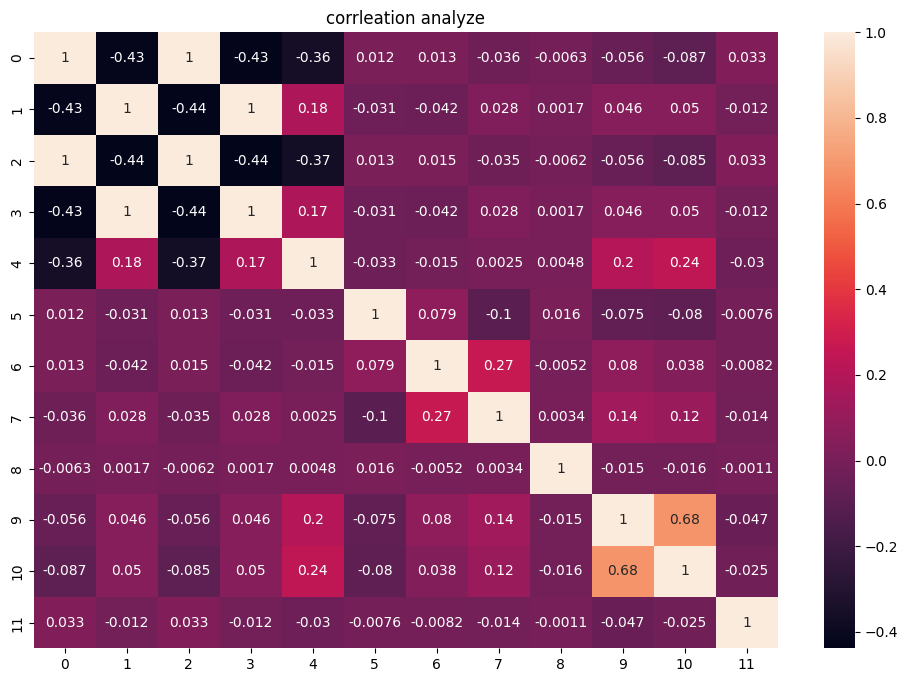

In [95]:
plt.figure(figsize=(12,8))
sns.heatmap(df_scaled.corr(), annot=True)
plt.title('corrleation analyze')
plt.show()

In [97]:
scaler = StandardScaler()
df_scaled1 = pd.DataFrame(scaler.fit_transform(df))

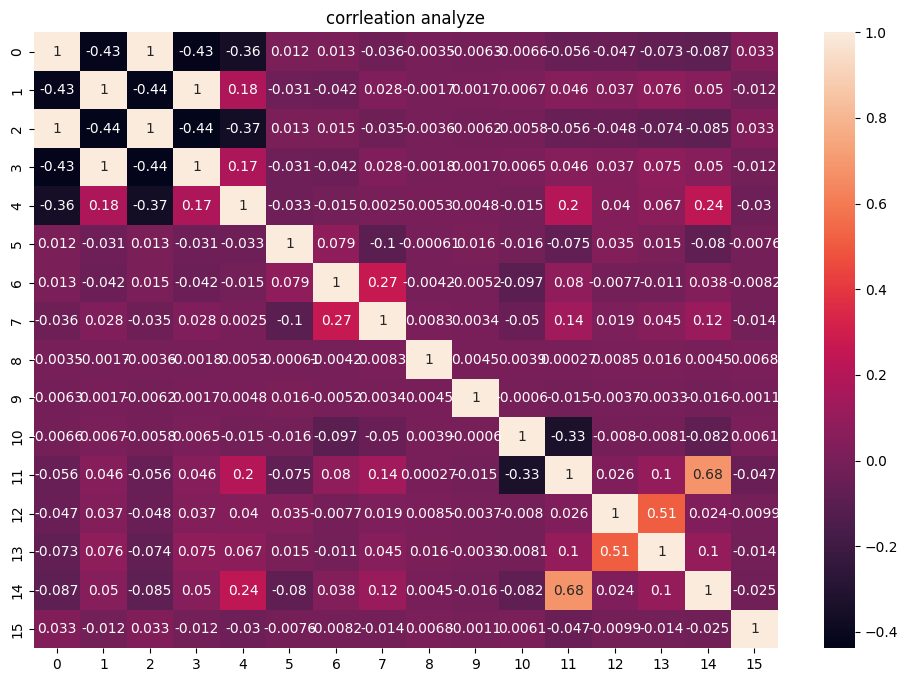

In [98]:
plt.figure(figsize=(12,8))
sns.heatmap(df_scaled1.corr(), annot=True)
plt.title('corrleation analyze')
plt.show()

In [99]:
pca = PCA(n_components= 0.9)
df_pca = pca.fit_transform(df_scaled)

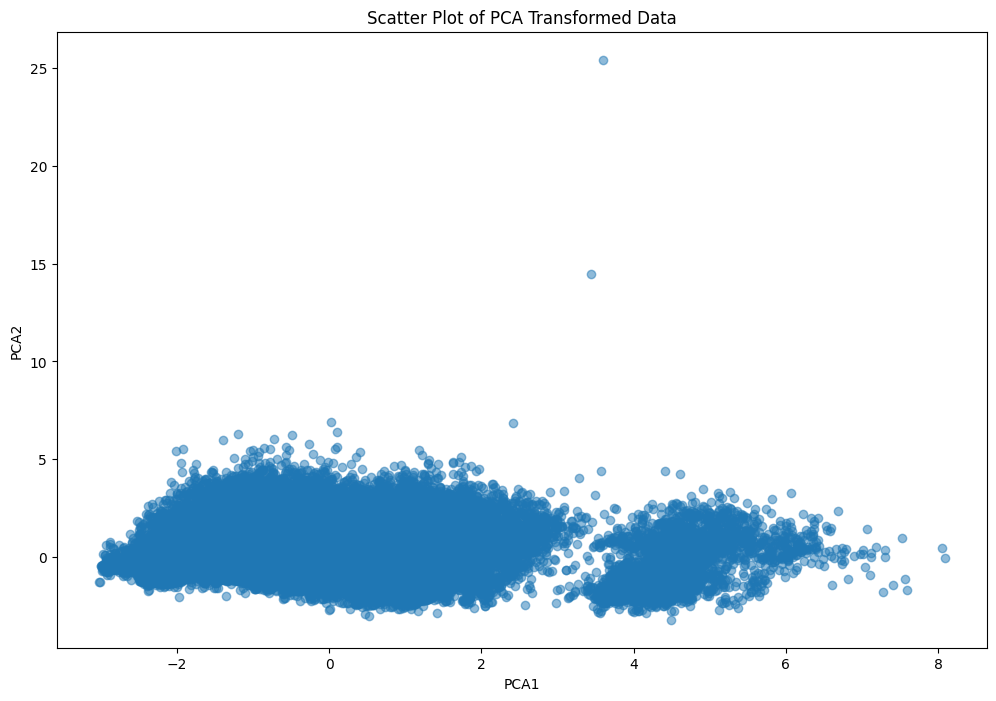

In [100]:
plt.figure(figsize=(12,8))
plt.scatter(df_pca[:,0], df_pca[:,1], alpha=0.5)
plt.title('Scatter Plot of PCA Transformed Data')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

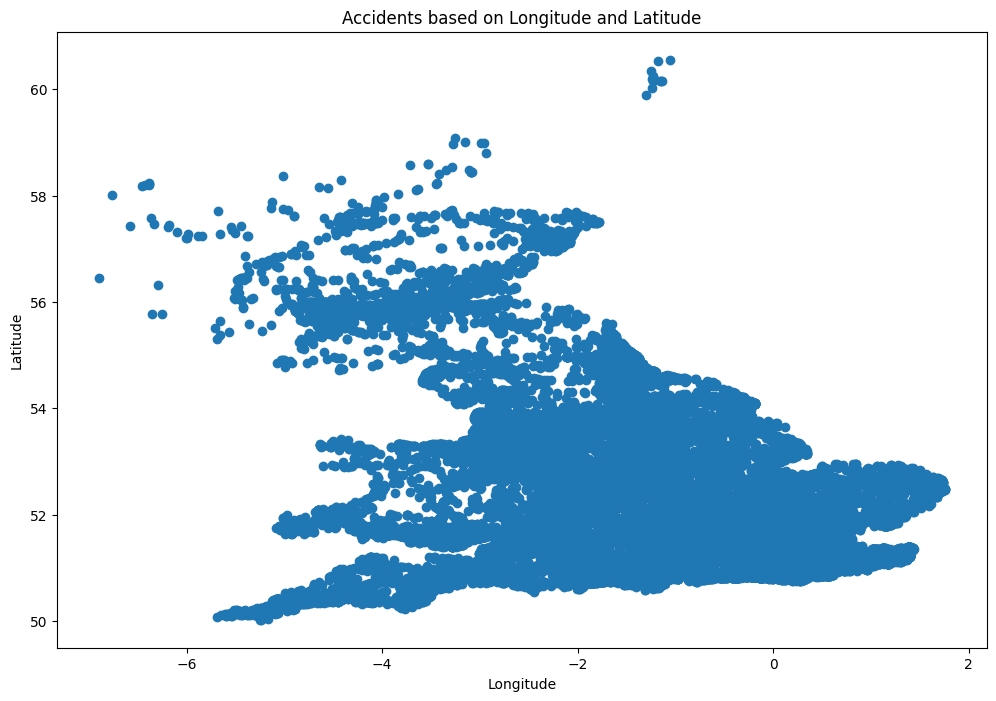

In [105]:
plt.figure(figsize=(12,8))
plt.scatter(df['Longitude'], df['Latitude'])
plt.title('Accidents based on Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [107]:
inertia = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i , init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(df_pca)
  inertia.append(kmeans.inertia_)

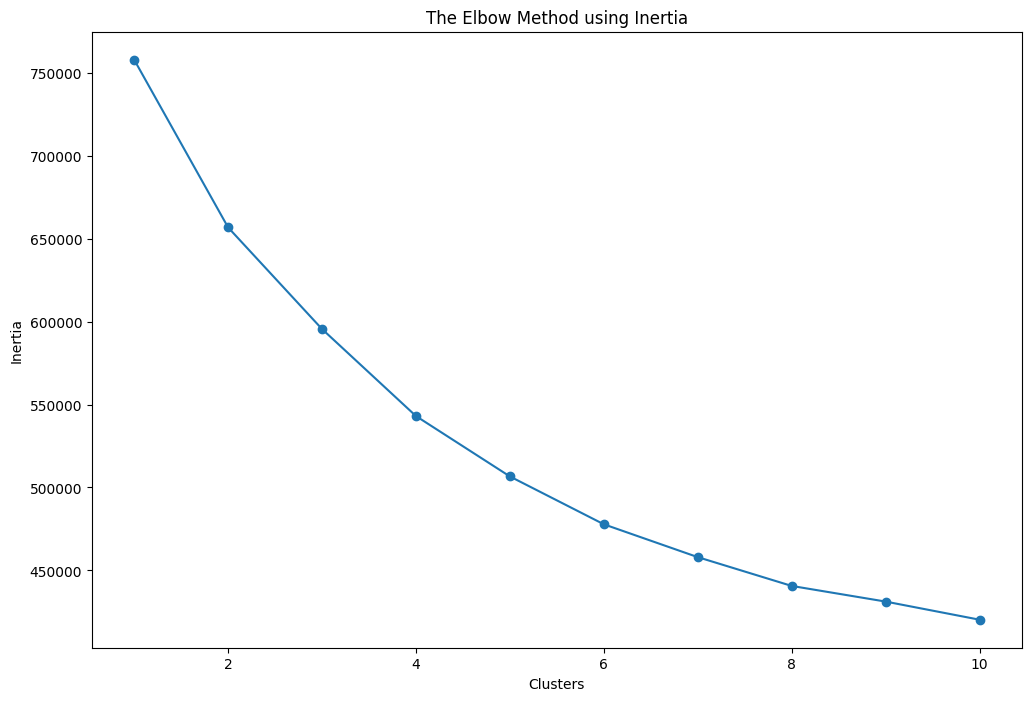

In [108]:
plt.figure(figsize=(12,8))
plt.plot(range(1,11), inertia, marker='o')
plt.title('The Elbow Method using Inertia')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()

In [120]:
k = 9
kmeans = KMeans(n_clusters= k, random_state=0)
kmeans.fit(df_pca)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

print("Cluster Centers:", centers)
print("Cluster Labels:", labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers: [[-1.92828197e+00 -6.38360279e-01  2.33407064e-01  8.60376441e-02
  -1.18826149e-02 -1.52921181e-01  3.35562391e-01 -4.73551884e-01
   4.53310173e-01  2.00558990e-01 -1.12293103e-01]
 [ 8.52043976e-01  1.97898608e-01  2.60057546e-01 -1.64282307e+00
   1.78653283e+00  1.56544872e-01  7.46938250e-03 -1.56082099e-01
   1.45592924e-01 -6.19557231e-02  2.16185723e-01]
 [-2.45564683e-01  1.76833356e-01  6.26026869e-01 -6.99536197e-02
  -7.60274976e-01  1.96865340e+00 -8.40972826e-02  3.22020436e-01
   1.74788707e-01 -9.03579549e-01 -2.02178027e-01]
 [ 5.33166753e-01 -1.20653448e+00  3.50401830e-01  6.00216814e-01
   1.87212825e-03 -3.32211165e-01 -6.56675821e-03 -3.75306274e-02
  -8.74689785e-02 -3.61117938e-02  4.91798584e-01]
 [-1.71431527e+00 -4.42340665e-01  2.54944705e-01 -5.43235035e-02
   2.03310546e-01 -3.09174535e-01 -4.53020963e-01  6.56358069e-01
  -7.47329383e-01  8.55289522e-02 -3.51645884e-01]
 [ 1.08470481e-01  2.62656050e+00  5.29421125e-01  3.60709280e-01
  

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [121]:
silhouette_evaluate = silhouette_score(df_pca, labels)
print("silhouette metrics:", silhouette_evaluate)

silhouette metrics: 0.11231266367075517


## Plot the data points with their predicted cluster center

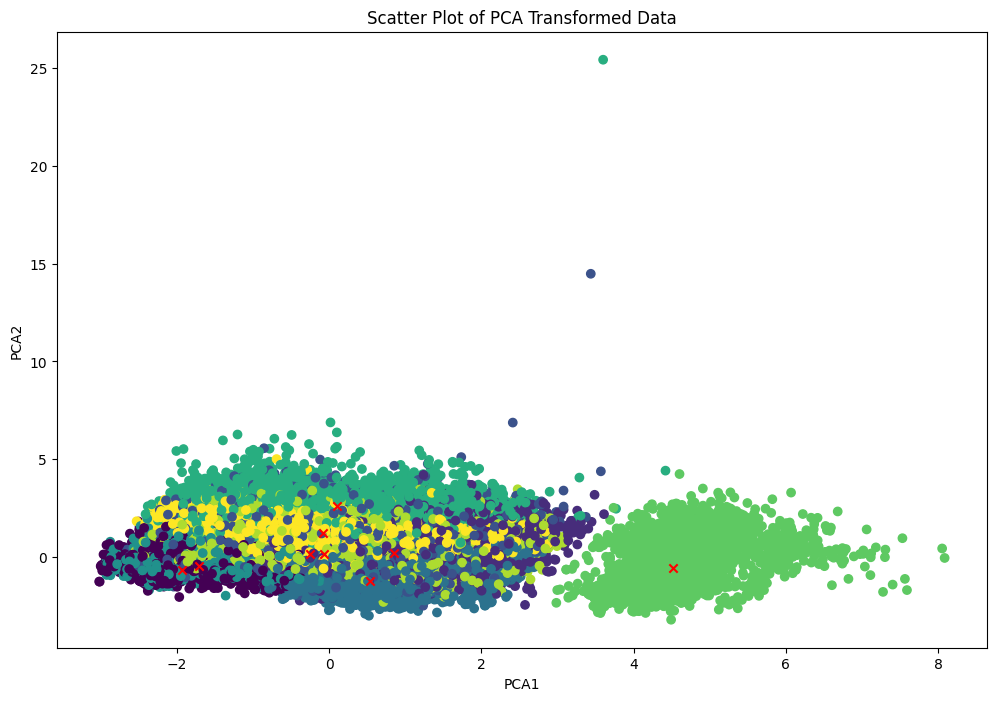

In [122]:
plt.figure(figsize=(12,8))
plt.scatter(df_pca[:,0], df_pca[:,1] ,c=labels)
plt.scatter(centers[:,0], centers[:,1], c='red', marker='x')
plt.title('Scatter Plot of PCA Transformed Data')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?